# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is t

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ayodejiadesegun"
kaggle_key = "d275c02aa04f6c0b324a02426528cd9f"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!pip install kaggle
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 349MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
train = pd.read_csv("data/train.csv")
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train["datetime"] = pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("data/test.csv")
test["datetime"] = pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("data/sampleSubmission.csv")

submission["datetime"] = pd.to_datetime(submission["datetime"])

submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
label_column = "count"
eval_metric = "root_mean_squared_error"

# Fit the TabularPredictor with specific configurations
predictor = TabularPredictor(
    label=label_column,
    eval_metric=eval_metric
).fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600,
    presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250908_212626"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.38 GB / 12.67 GB (89.8%)
Disk Space Avail:   62.10 GB / 107.72 GB (57.6%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the opti

(_ray_fit pid=3476) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=3686) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=3744) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=3744) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=3744) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=3744) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=3814) [1000]	valid_set's rmse: 135.845
(_ray_fit pid=3744) [5000]	valid_set's rmse: 125.681
(_ray_fit pid=3744) [6000]	valid_set's rmse: 125.468
(_ray_fit pid=3744) [8000]	valid_set's rmse: 125.498 [repeated 4x across cluster]


(_ray_fit pid=3744) 	Ran out of time, early stopping on iteration 8296. Best iteration is:
(_ray_fit pid=3744) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=3814) [7000]	valid_set's rmse: 132.416 [repeated 4x across cluster]


(_ray_fit pid=3814) 	Ran out of time, early stopping on iteration 7941. Best iteration is:
(_ray_fit pid=3814) 	[7329]	valid_set's rmse: 132.331


(_ray_fit pid=3964) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=3964) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=3964) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=3964) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=3964) [5000]	valid_set's rmse: 135.358
(_ray_fit pid=4030) [1000]	valid_set's rmse: 139.958
(_ray_fit pid=4030) [4000]	valid_set's rmse: 138.084 [repeated 6x across cluster]


(_dystack pid=3296) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3296) 	97.9s	 = Training   runtime
(_dystack pid=3296) 	14.71s	 = Validation runtime
(_dystack pid=3296) Fitting model: WeightedEnsemble_L2 ... Training model for up to 142.88s of the 33.13s of remaining time.
(_dystack pid=3296) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 1.0}
(_dystack pid=3296) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3296) 	0.0s	 = Training   runtime
(_dystack pid=3296) 	0.0s	 = Validation runtime
(_dystack pid=3296) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=3296) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 33.12s of the 33.10s of remaining time.
(_dystack pid=3296) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
(_dystack pid=3296) 	-131.5461	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3296) 	39.2s

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -115.192604  root_mean_squared_error      18.637485  396.434973                0.000726           0.024408            3       True          9
1         LightGBM_BAG_L2 -115.634712  root_mean_squared_error      17.543800  298.107431                0.160900          40.942759            2       True          7
2       LightGBMXT_BAG_L2 -115.865095  root_mean_squared_error      17.724302  307.408815                0.341401          50.244142            2       True          6
3  RandomForestMSE_BAG_L1 -116.548359  root_mean_squared_error       0.689521   22.661875                0.689521          22.661875            1       True          3
4     WeightedEnsemble_L2 -116.548359  root_mean_squared_error       0.690270   22.685319         

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-131.46090891834504),
  'LightGBM_BAG_L1': np.float64(-131.054161598899),
  'RandomForestMSE_BAG_L1': np.float64(-116.54835939455667),
  'CatBoost_BAG_L1': np.float64(-131.2483044613403),
  'WeightedEnsemble_L2': np.float64(-116.54835939455667),
  'LightGBMXT_BAG_L2': np.float64(-115.86509489603789),
  'LightGBM_BAG_L2': np.float64(-115.63471178288677),
  'RandomForestMSE_BAG_L2': np.float64(-118.45525745801403),
  'WeightedEnsemble_L3': np.float64(-115.1926038

### Create predictions from test dataset

In [12]:
predictions = predictor.predict(test)
predictions.head()

,count
0,95.640427
1,99.444855
2,99.444855
3,98.694954
4,98.694954


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [13]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,220.724930
std,126.227722
min,18.290588
25%,124.496681
50%,197.029877
75%,302.937775
max,621.551025


In [14]:
# How many negative values do we have?
len(predictions[predictions < 0])

0

In [15]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [16]:
submission["count"] = predictions
submission.to_csv("submissions/submission.csv", index=False)

In [17]:
!kaggle competitions submit -c bike-sharing-demand -f submissions/submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 972kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [18]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-09-08 21:38:05.620000  first raw submission               SubmissionStatus.COMPLETE  1.43093      1.43093       
submission_new_features.csv  2025-09-08 19:11:23.227000  new features                       SubmissionStatus.COMPLETE  0.48573      0.48573       
submission.csv               2025-09-08 18:58:48.523000  first raw submission               SubmissionStatus.COMPLETE  1.43270      1.43270       
submission_new_hpo.csv       2025-09-08 15:13:53.800000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.46639      0.46639       


#### Initial score of `1.43093`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

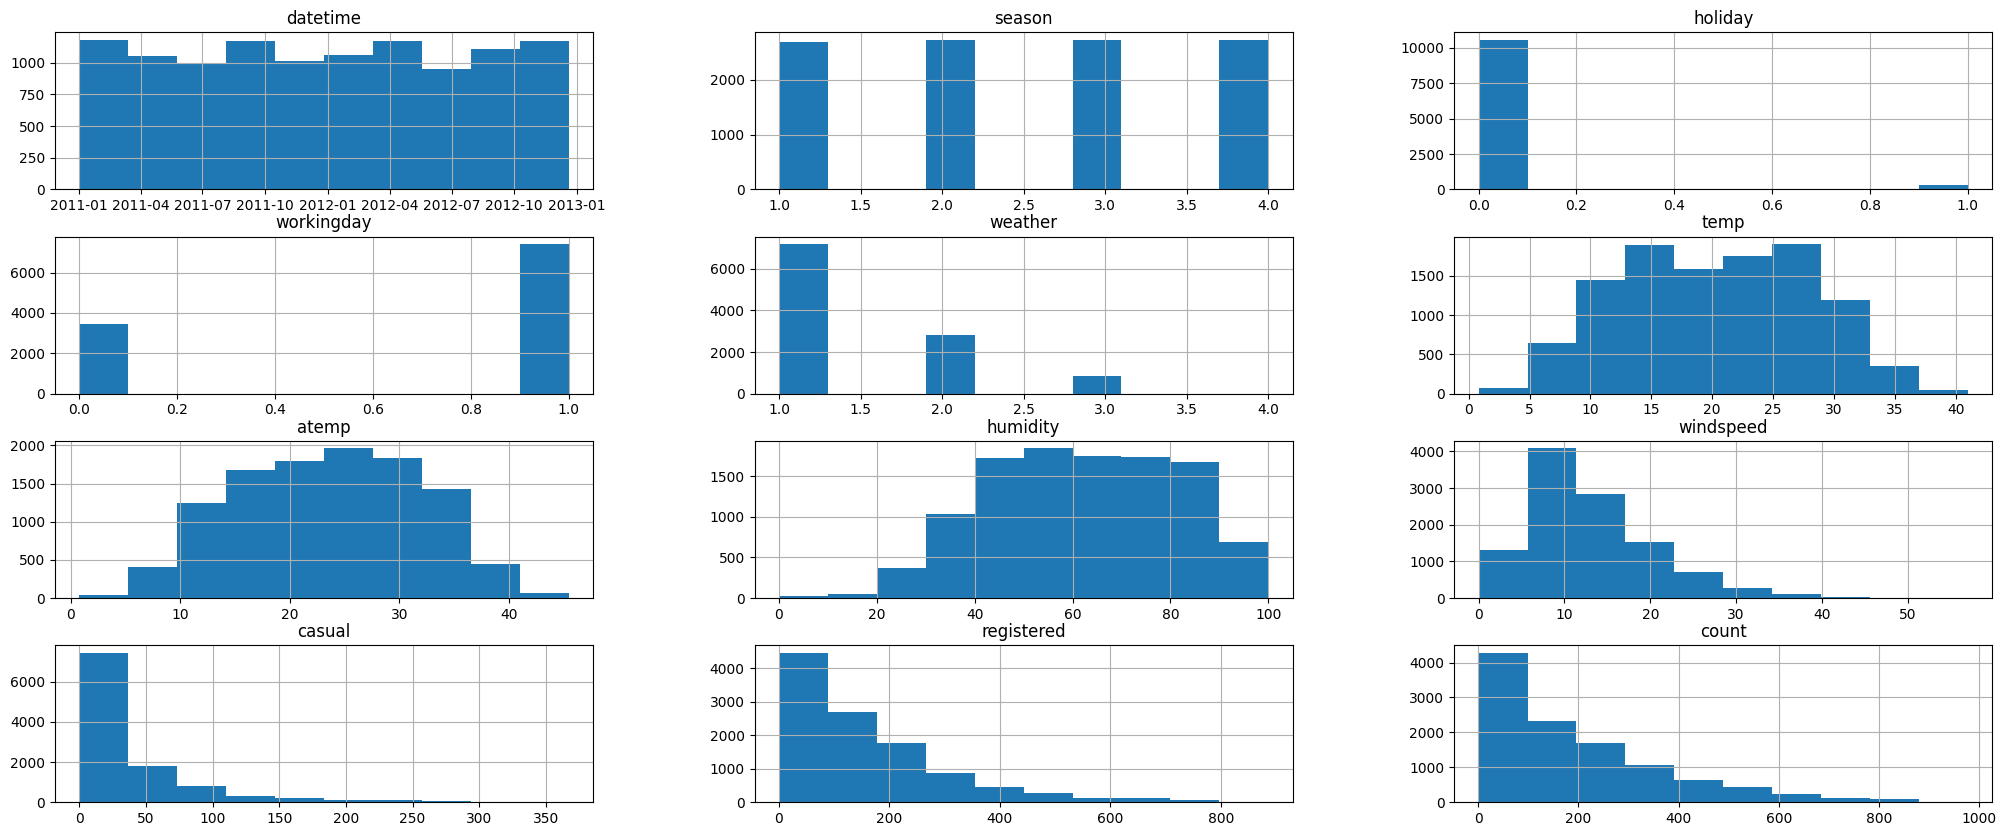

In [19]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(25, 10))

In [20]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
train["day"] = train["datetime"].dt.day
train["month"] = train["datetime"].dt.month

test["hour"] =  test["datetime"].dt.hour
test["day"] =  test["datetime"].dt.day
test["month"] =  test["datetime"].dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [21]:
categorical_columns = ["season", "weather"]

train[categorical_columns] = train[categorical_columns].astype("category")

test[categorical_columns] = test[categorical_columns].astype("category")


In [22]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


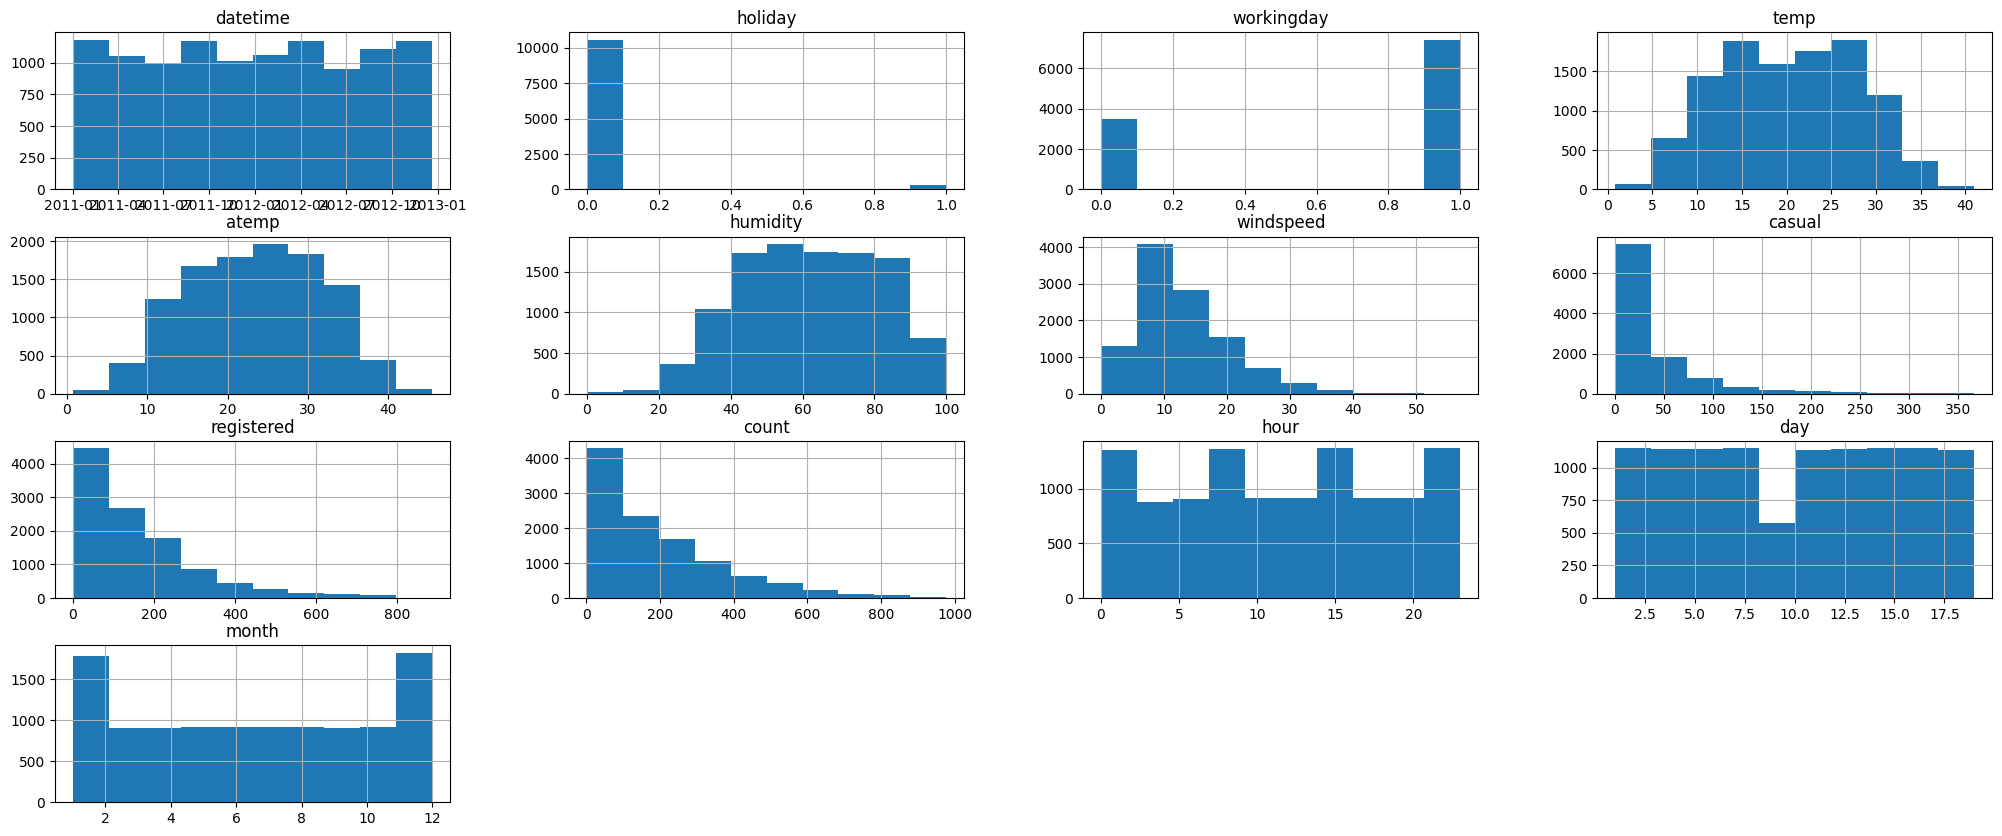

In [23]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(25, 10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [24]:
predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error").fit(
        train_data=train.drop(columns=["casual", "registered"]),
        time_limit=600,
        presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250908_213836"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.61 GB / 12.67 GB (83.7%)
Disk Space Avail:   61.41 GB / 107.72 GB (57.0%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the opti

In [25]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -32.252850  root_mean_squared_error      32.657132  310.374036                0.000827           0.022122            3       True          8
1     WeightedEnsemble_L2 -32.464159  root_mean_squared_error      31.728535  226.679537                0.000738           0.016442            2       True          4
2         LightGBM_BAG_L2 -32.902444  root_mean_squared_error      31.893042  266.538806                0.165245          39.875711            2       True          6
3  RandomForestMSE_BAG_L2 -33.158237  root_mean_squared_error      32.491060  270.476203                0.763263          43.813107            2       True          7
4       LightGBMXT_BAG_L2 -33.489710  root_mean_squared_error      32.268471  272.914913               

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-34.51903091052072),
  'LightGBM_BAG_L1': np.float64(-33.916920183145294),
  'RandomForestMSE_BAG_L1': np.float64(-38.40890681984868),
  'WeightedEnsemble_L2': np.float64(-32.46415911246644),
  'LightGBMXT_BAG_L2': np.float64(-33.48970991867565),
  'LightGBM_BAG_L2': np.float64(-32.902443996189554),
  'RandomForestMSE_BAG_L2': np.float64(-33.15823674660346),
  'WeightedEnsemble_L3': np.float64(-32.25285039643202)},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
 

In [26]:
# Remember to set all negative values to zero
predictions.describe()
predictions_new = predictor_new_features.predict(test)
predictions_new[predictions_new < 0] = 0
predictions_new.head()

,count
0,14.783237
1,4.216594
2,3.106265
3,2.913574
4,2.753078


In [27]:
# Same submitting predictions
submission_new_features = pd.read_csv("data/sampleSubmission.csv")
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submissions/submission_new_features.csv", index=False)

In [28]:
!kaggle competitions submit -c bike-sharing-demand -f submissions/submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.04MB/s]
Successfully submitted to Bike Sharing Demand

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-09-08 21:50:28.573000  new features                       SubmissionStatus.PENDING                              
submission.csv               2025-09-08 21:38:05.620000  first raw submission               SubmissionStatus.COMPLETE  1.43093      1.43093       
submission_new_features.csv  2025-09-08 19:11:23.227000  new features                       SubmissionStatus.COMPLETE  0.48573      0.48573       
submission.csv               2025-09-08 18:58:48.523000  first raw submission               SubmissionStatus.COMPLETE  1.43270      1.43270       


#### New Score of `0.48573`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [31]:
from autogluon.tabular import TabularPredictor
from autogluon.common import space

# Specify hyperparameter values for neural network models
nn_params = {
    "num_epochs": 10,  # Number of training epochs
    "learning_rate": space.Real(1e-4, 1e-2, default=5e-4, log=True),  # Learning rate
    "activation": space.Categorical("relu", "softrelu", "tanh"),  # Activation function
    "dropout_prob": space.Real(0.0, 0.5, default=0.1)  # Dropout probability
}

# Specify hyperparameter values for LightGBM gradient boosted trees
gbm_params = {
    "num_boost_round": 100,  # Number of boosting rounds to control training time of GBM models
    "num_leaves": space.Int(lower=26, upper=66, default=36)  # Number of leaves in trees
}

# Specify hyperparameter values for different types of models
hyperparameters = {
    "GBM": gbm_params,
    "NN_TORCH": nn_params
}

# Specify hyperparameter tuning options
hyperparameter_tune_kwargs = {
    "num_trials": 5,  # Try at most 5 different hyperparameter configurations for each type of model
    "scheduler": "local",  # Use a local scheduler
    "searcher": "auto"  # Use an automatic searcher
}

predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error").fit(
        train_data=train.drop(columns=["casual", "registered"]),
        time_limit=900,
        presets="best_quality",
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
        num_bag_sets=1
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250908_215411"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.37 GB / 12.67 GB (81.9%)
Disk Space Avail:   60.73 GB / 107.72 GB (56.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-40.2554	 = Validation score   (-root_mean_squared_error)
	43.26s	 = Training   runtime
	0.26s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-39.3962	 = Validation score   (-root_mean_squared_error)
	44.21s	 = Training   runtime
	0.27s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-38.2388	 = Validation score   (-root_mean_squared_error)
	45.51s	 = Training   r

+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 5                       |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L1


2025-09-08 22:04:26,227	INFO timeout.py:54 -- Reached timeout of 199.57627400829793 seconds. Stopping all trials.
2025-09-08 22:04:26,267	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L1' in 0.0250s.
2025-09-08 22:04:36,299	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- dd00b38b: FileNotFoundError('Could not fetch metrics for dd00b38b: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L1/dd00b38b')
- 5109d83d: FileNotFoundError('Could not fetch metrics for 5109d83d: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L1/5109d83d')
- 90e3d538: FileNotFoundError('Could not fetch metrics for 90e3d538: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250908_215411/models/N

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-36.8393	 = Validation score   (-root_mean_squared_error)
	54.2s	 = Training   runtime
	0.21s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-36.6988	 = Validation score   (-root_mean_squared_error)
	44.93s	 = Training   runtime
	0.18s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 124.29s of the 176.92s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L2   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 5                       |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L2


2025-09-08 22:08:20,158	INFO timeout.py:54 -- Reached timeout of 124.29187670946122 seconds. Stopping all trials.
2025-09-08 22:08:20,180	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L2' in 0.0137s.
2025-09-08 22:08:20,310	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- d254008f: FileNotFoundError('Could not fetch metrics for d254008f: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L2/d254008f')
- 3fff9636: FileNotFoundError('Could not fetch metrics for 3fff9636: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250908_215411/models/NeuralNetTorch_BAG_L2/3fff9636')
- f0f8b1dd: FileNotFoundError('Could not fetch metrics for f0f8b1dd: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250908_215411/models/N

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250908_215411")


In [32]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                            model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             WeightedEnsemble_L3  -36.432508  root_mean_squared_error       2.244327  478.465619                0.001042           0.042064            3       True         10
1              LightGBM_BAG_L2/T2  -36.698828  root_mean_squared_error       1.452253  325.447615                0.178586          44.930326            2       True          8
2              LightGBM_BAG_L2/T1  -36.839260  root_mean_squared_error       1.481128  334.719049                0.207462          54.201760            2       True          7
3  NeuralNetTorch_BAG_L2/d254008f  -37.967210  root_mean_squared_error       1.857237  379.291470                0.583570          98.774180            2       True          9
4             WeightedEnsemble_L2  -38.032252  root_mean_s

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/dd00b38b': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2/d254008f': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': np.float64(-40.255448619289915),
  'LightGBM_BAG_L1/T2': np.float64(-39.39618900838858),
  'LightGBM_BAG_L1/T3': np.float64(-38.23880603852151),
  'LightGBM_BAG_L1/T4': np.float64(-119.46199789474667),
  'NeuralNetTorch_BAG_L1/dd00b38b': np.float64(-98.26633794063363),
  'WeightedEnsemble_L2': np.float64(-38.03225190908349),
  'LightGBM_BAG_L2/T1': np.float64(-

In [33]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [34]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("data/sampleSubmission.csv")
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submissions/submission_new_hpo.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submissions/submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 989kB/s]
Successfully submitted to Bike Sharing Demand

In [37]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-09-08 22:08:28.587000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.46639      0.46639       
submission_new_features.csv  2025-09-08 21:50:28.573000  new features                       SubmissionStatus.COMPLETE  0.49168      0.49168       
submission.csv               2025-09-08 21:38:05.620000  first raw submission               SubmissionStatus.COMPLETE  1.43093      1.43093       
submission_new_features.csv  2025-09-08 19:11:23.227000  new features                       SubmissionStatus.COMPLETE  0.48573      0.48573       


#### New Score of `0.46639`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

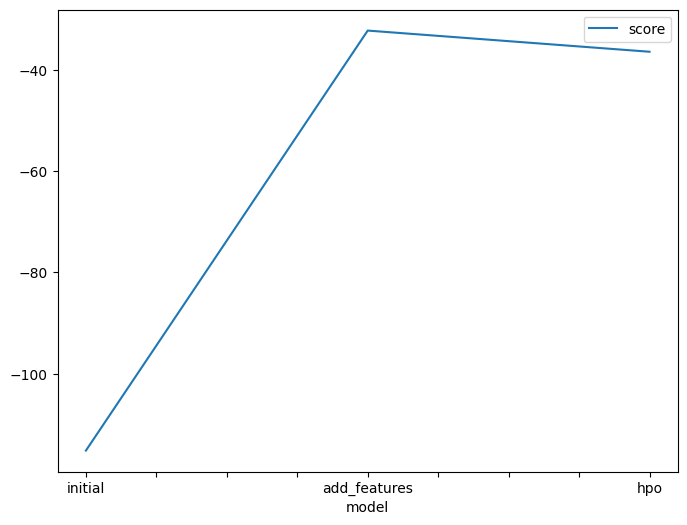

In [39]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-115.192604 , -32.252850, -36.432508]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

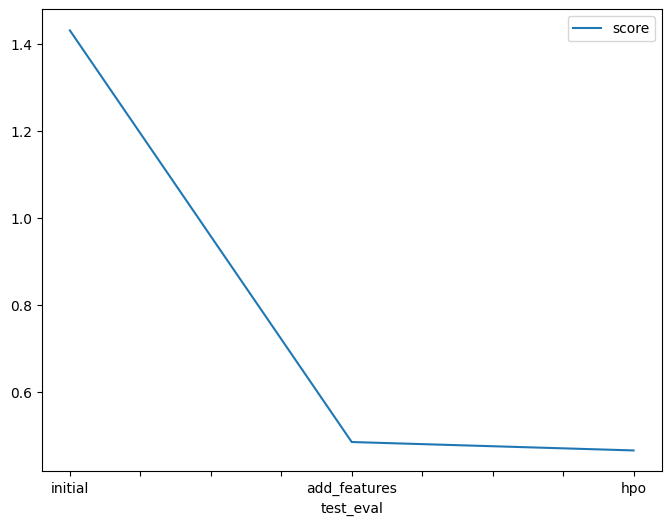

In [40]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score":  [1.43093, 0.48573, 0.46639]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

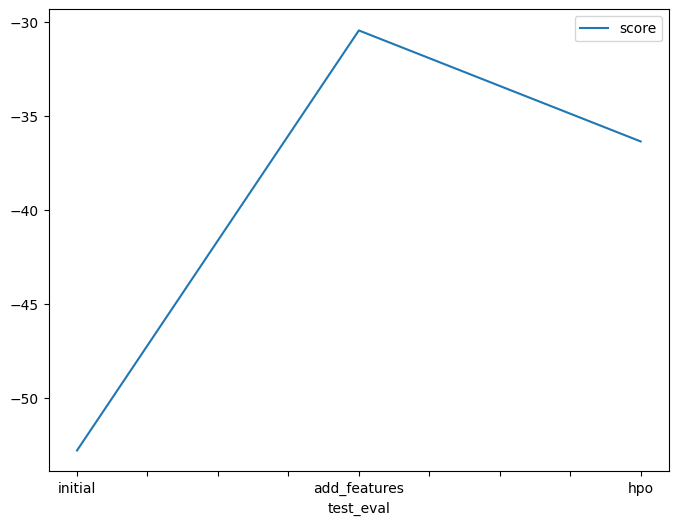

In [42]:
# Take the 3 test evaluation scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [-52.785675, -30.438726, -36.344086]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('images/model_test_score.png')

### Hyperparameter table

In [43]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "eval_metric": ["root_mean_squared_error", "root_mean_squared_error", "root_mean_squared_error"],
    "presets": ["best_quality", "best_quality", "best_quality"],
    "num_bag_sets": [None, None, 1],
    "time_limit": [600, 600, 900],
    "score": [ 1.8007, 0.63507, 0.468]
})

,model,eval_metric,presets,num_bag_sets,time_limit,score
0,initial,root_mean_squared_error,best_quality,NaN,600,1.80070
1,add_features,root_mean_squared_error,best_quality,NaN,600,0.63507
2,hpo,root_mean_squared_error,best_quality,1.0,900,0.46800
